# 機械学習　線形回帰スクラッチ

In [264]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as msno

In [670]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter, lr, no_bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
       #重みシータ 更新していく 
        self.coef = None 
        
    def fit(self, X, y, X_val=None, y_val=None, val=False):
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        
        self.X_train =X
        self.y = y
        self.X_val = X_val
        self.y_val = y_val
        
        
        
            
        if not self.no_bias:
            X_bias= np.ones((self.X_train.shape[0],1))
            X_train_bias = np.concatenate([X_bias,self.X_train], 1)
            print(X_train_bias.shape)
            print(y.shape)
            #y = np.random.rand(X_train_bias.shape[0],1)
            if val:
                X_val_bias_b= np.ones((self.X_val.shape[0],1))
                print( X_val_bias_b.shape)
                X_val_bias = np.concatenate([X_val_bias_b,self.X_val], 1)
                print(X_val_bias.shape)
                #y_val = np.random.rand(X_val_bias.shape[0],1)
        #coefの初期値だけ作る
        self.coef = np.random.randn(X_train_bias.shape[1],1) #heta 平均0、分散1（標準偏差1）の正規分布（標準正規分布）に従う乱数を返す。      
        

        for i in range(self.iter):
            #予測した住宅価格(仮定関数)
            hyho = self._linear_hypothesis(X_train_bias) 
            # error (予測と実測の誤差)
#             print(hyho.shape)
#             print(self.y.shape)
#             print(type(self.y))
#             self.y = self.y.values.reshape(hyho.shape)
#             print(self.y.shape)
            error = (hyho) - self.y
            #coef更新
            self.coef = self._gradient_descent(X_train_bias, error)

            #MSEに必要なy_predを予測するためにdef predict
            pred_y = self.predict(X_train_bias) #y_pred更新
            #目的関数（損失関数）
            self.loss[i] = self.mse(pred_y, self.y) / 2
            if val:
                hyho_val= self._linear_hypothesis(X_val_bias)
                error_val = (hyho_val) - self.y_val
                self.coef = self._gradient_descent(X_val_bias, error_val)
                #???
                pred_y_val = self.predict(X_val_bias) 
                self.val_loss[i] = self.mse(pred_y_val, self.y_val) / 2
            if (self.verbose) & (i % 100 == 0):
                print(f'train：{self.loss[i]}')
                if val:
                    print(f'val：{self.val_loss[i]}')
        
        
        
        
        
    def predict(self, X): 
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        # ベストな固定値coefを使う
        y_pred = np.dot(X, self.coef) #ベストなthetaとテストデータで目的関数y_predを予測　X=X_test
        
        
        return y_pred
    
    
      
    
    def _linear_hypothesis(self,X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        hyho = np.dot(X, self.coef) # 内積して  線形回帰の仮定関数 
       
        return hyho
    
    def _gradient_descent(self,X, error):
        """
        説明を記述
        """
        

        #  式を実装
        grad = np.dot(X.T, error)

        nanka = (self.lr/X.shape[0])*grad

        self.coef = self.coef - nanka
        #更新するcoef
        return self.coef
    
    def mse(self,y_pred, y):
        """
        平均二乗誤差の計算

        Parameters
        ----------
        y_pred : 次の形のndarray, shape (n_samples,)
          推定した値
        y : 次の形のndarray, shape (n_samples,)
          正解値

        Returns
        ----------
        mse : numpy.float
          平均二乗誤差
        """
        return np.mean(np.power(y_pred - y, 2))
  
        

       
        return

In [671]:
from sklearn.datasets import load_boston

boston = load_boston()
X = boston['data']
y = boston['target']

In [672]:
my_lr = ScratchLinearRegression(2000, 0.000000000001, no_bias=False,verbose=True)

In [673]:
my_lr.fit(X, y)

(506, 14)
(506,)
train：458470.43626058364
train：458442.0934848504
train：458413.75248185
train：458385.4132514715
train：458357.07579360425
train：458328.74010813684
train：458300.40619495854
train：458272.0740539584
train：458243.74368502555
train：458215.41508804885
train：458187.0882629175
train：458158.76320952066
train：458130.4399277473
train：458102.11841748666
train：458073.7986786278
train：458045.4807110598
train：458017.1645146719
train：457988.8500893528
train：457960.5374349922
train：457932.2265514789


# 【問題1】仮定関数

以下の数式で表される線形回帰の仮定関数を実装してください。メソッドの雛形を用意してあります

# 【問題2】最急降下法

最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください

# 【問題3】推定

推定する仕組みを実装してください。ScratchLinearRegressionクラスの雛形に含まれるpredictメソッドに書き加えてください。

# 【問題4】平均二乗誤差

線形回帰の指標値として用いられる平均二乗誤差（mean square error, MSE）の関数を作成してください。

平均二乗誤差関数は回帰問題全般で使える関数のため、ScratchLinearRegressionクラスのメソッドではなく、別の関数として作成してください。雛形を用意してあります。

平均二乗誤差は以下の数式で表されます。

＊上に記載

# 【問題5】目的関数

以下の数式で表される線形回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。

目的関数（損失関数） は次の式です。

# 【問題6】学習と推定

機械学習スクラッチ入門のSprintで用意したHouse Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なってください。

scikit-learnによる実装と比べ、正しく動いているかを確認してください。

In [674]:
train = pd.read_csv('h_train.csv')
test = pd.read_csv('h_test.csv')
y_ = train['SalePrice']
del train['SalePrice']
train = train.select_dtypes(include=['int', 'float'])
test = test.select_dtypes(include=['int', 'float'])
train = train.replace(np.inf, np.nan).fillna(0)
test = test.replace(np.inf, np.nan).fillna(0)




from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train = sc.fit_transform(train)
test = sc.transform(test)

In [675]:
y_

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [676]:
#y_.values.reshape([1460,1])

In [677]:
#y_[:, np.newaxis]

In [678]:
from sklearn.model_selection import train_test_split
train, val_train, train_y, val_y = train_test_split(train, y_, test_size=0.33, random_state=42)
print(train.shape)
print(val_train.shape)
print(train_y.shape)
print(val_y.shape)


(978, 37)
(482, 37)
(978,)
(482,)


In [679]:
#train_y[:, np.newaxis].shape
train_y = train_y[:, np.newaxis]


In [680]:
# val_y[:, np.newaxis].shape
val_y = val_y[:, np.newaxis]

In [695]:
my_lr2 = ScratchLinearRegression(10000, 0.0001, no_bias=False, verbose=True)


In [696]:
my_lr2.fit(train, train_y, val_train, val_y, val=True)

(978, 38)
(978, 1)
(482, 1)
(482, 38)
train：19281060818.321342
val：19977781621.18117
train：18072698342.558083
val：18760506712.97765
train：17024397458.62692
val：17702212804.02037
train：16103007277.304386
val：16769712534.698132
train：15283106205.495659
val：15937644079.868963
train：14545157646.766224
val：15186586913.572618
train：13874108009.168015
val：14501632403.433615
train：13258320764.468458
val：13871299480.585407
train：12688765851.206984
val：13286712100.04664
train：12158403116.075077
val：12740975295.064579
train：11661713223.098913
val：12228701874.567364
train：11194340651.093634
val：11745653382.656391
train：10752821899.618795
val：11288467718.945518
train：10334378479.70321
val：10854452480.974787
train：9936759169.593824
val：10441428145.317656
train：9558119741.05869
val：10047609039.78515
train：9196931191.840206
val：9671512969.366123
train：8851909669.9942
val：9311892566.41543
train：8521962909.549731
val：8967683110.502645
train：8206149238.338467
val：8637962833.821463
train：7903646162.261295

# 【問題7】学習曲線のプロット

学習曲線を表示する関数を作成し、実行してください。グラフを見て損失が適切に下がっているかどうか確認してください。

線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。

In [697]:
x=list(range(len(my_lr2.loss)))

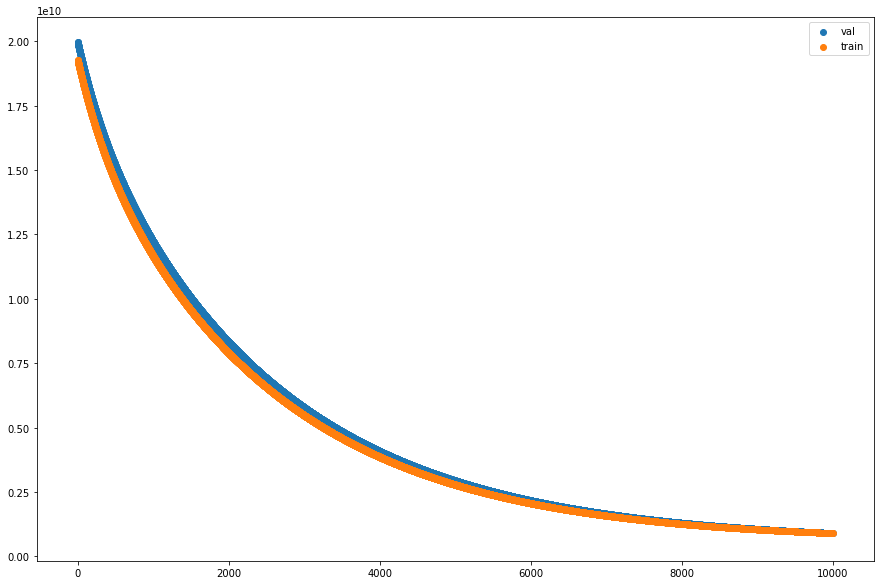

In [698]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(x, my_lr2.val_loss, label='val')
plt.scatter(x,my_lr2.loss, label='train')
plt.legend()
plt.show()